# 환경설정

In [ ]:
# colab 드라이브 연결하기 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터프레임 다루기 
import pandas as pd 
import numpy as np 

import warnings 
warnings.filterwarnings('ignore')

# 데이터 전처리

In [ ]:
# 데이터 불러오기 
df_nt = pd.read_csv('/content/drive/MyDrive/프로젝트/문화관광빅데이터/NATIVE_RE.txt', sep = '|')
df_nt.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,취미오락,외식,M,30,201701,RED,활동,351296766,19010
1,세종,세종,.,취미오락,종합쇼핑,M,50,201701,RED,휴식,72244196,2375
2,세종,세종,.,취미오락,종합쇼핑,M,30,201701,WHITE,휴식,532911085,19979
3,충남,세종,.,취미오락,종합쇼핑,M,50,201701,WHITE,활동,50972534,951
4,충남,세종,.,취미오락,종합쇼핑,M,40,201701,RED,휴식,19104457,408


In [ ]:
# 데이터 컬럼 확인 
df_nt.columns

Index(['v1', 'v2', 'v3', 'gb3', 'gb2', 'sex_ccd', 'cln_age_r', 'ta_ym',
       'daw_ccd_r', 'apv_ts_dl_tm_r', 'vlm', 'usec'],
      dtype='object')

In [ ]:
# 데이터 컬럼 명 변경 
df_nt.rename(columns={'v1':'거주지', 'v2':'이용_시도', 'v3':'이용_시군구', 'gb3':'업종대','gb2':'업종소','sex_ccd':'성별','cln_age_r':'연령대', 'ta_ym':'이용년월',
       'daw_ccd_r' :'요일', 'apv_ts_dl_tm_r':'이용시간대', 'vlm':"취급액(원)", 'usec':'이용건수(건)'},inplace = True)

# 데이터 타입 확인 
df_nt.dtypes

거주지        object
이용_시도      object
이용_시군구     object
업종대        object
업종소        object
성별         object
연령대        object
이용년월        int64
요일         object
이용시간대      object
취급액(원)      int64
이용건수(건)     int64
dtype: object

In [ ]:
# 행 선택 
df_nt = df_nt[df_nt['업종대'] == '여행']
df_nt = df_nt[df_nt['이용년월']>=201901]

df_nt.head()

,거주지,이용_시도,이용_시군구,업종대,업종소,성별,연령대,이용년월,요일,이용시간대,취급액(원),이용건수(건)
24524739,인천,세종,.,여행,숙박,M,20,201901,WHITE,활동,2012000,45
24524742,제주,세종,.,여행,숙박,M,30,201901,WHITE,휴식,1006000,30
24524750,인천,세종,.,여행,숙박,F,50,201901,WHITE,활동,2665900,45
24524767,대전,세종,.,여행,체험,M,50,201901,WHITE,휴식,50300,5
24524803,충남,세종,.,여행,체험,F,30,201901,WHITE,활동,181080,15


In [ ]:
# 연월별 지출 데이터 추출 
df_cs = df_nt[['이용년월','취급액(원)','이용건수(건)']]
df_cs.reset_index(inplace = True, drop = True)
df_cs.head(5)

,이용년월,취급액(원),이용건수(건)
0,201901,2012000,45
1,201901,1006000,30
2,201901,2665900,45
3,201901,50300,5
4,201901,181080,15


In [ ]:
 df_cs = df_cs.groupby('이용년월').sum()
 df_cs.reset_index(inplace = True)
 df_cs.head()

In [ ]:
df_cs['년'] = df_cs['이용년월'] // 100 # 몫 계산 
df_cs['월'] = df_cs['이용년월'] % 100 # 나머지 
df_cs.head(5)

,이용년월,취급액(원),이용건수(건),년,월
0,201901,1507811536061,23865740,2019,1
1,201902,1249449412724,21839843,2019,2
2,201903,1263049292946,23033719,2019,3
3,201904,1315291939069,22879547,2019,4
4,201905,1433365398429,24495065,2019,5


# 연도별 여행 소비금액 변화 시각화

In [ ]:
# 모듈 불러오기 
import plotly.graph_objs as go 
import plotly.express as px  

In [ ]:
years = [2019, 2020, 2021] 
colors = ['#FF8364','#5F6CAF', '#FFB677' ]

fig = go.Figure() # 그래프 그릴 fig 생성 

for i in range(len(years)) : 
  fig.add_trace(go.Scatter(x = df_cs[df_cs['년']== years[i]]['월'], 
                           y = df_cs[df_cs['년']== years[i]]['취급액(원)'],
                           name = f'{years[i]}년 소비금액',
                           hovertemplate = '<i>월 : </i> : %{x}월' + 
                           '<br><br>소비금액(원)</b> : %{y} <br>',
                           line = dict(color = colors[i],
                                       width = 3)))

fig.update_layout(title = '연도별 여행 소비금액 변화 시각화',
                  xaxis_title = '월',
                  yaxis_title = '소비금액(원)',
                  plot_bgcolor = "#f4f4f4")

fig.show()

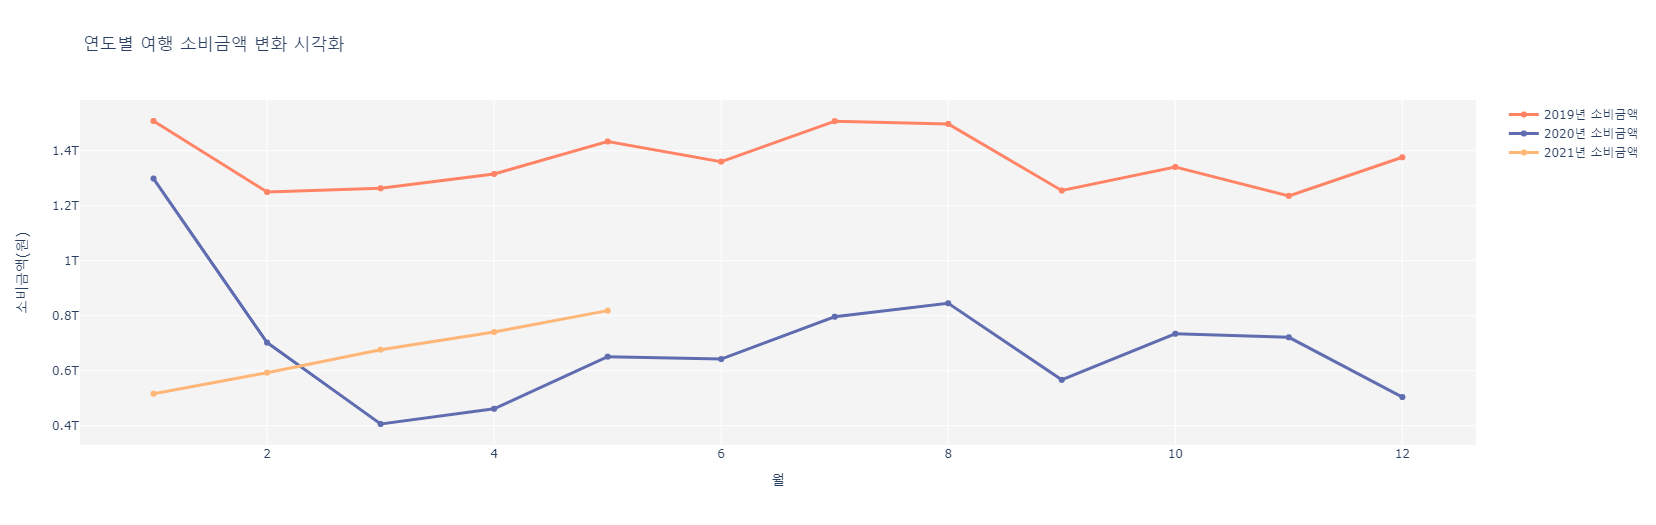